Link of Dataset https://archive.ics.uci.edu/ml/datasets/COVID-19+Surveillance

In [1]:
#Importing basic packages
import pandas as pd
import numpy as np

#for EDA purposes
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport


#Importing the Dataset
dataset = pd.read_csv('Surveillance.csv')

In [2]:
dataset.head()

,A01,A02,A03,A04,A05,A06,A07,Categories
0,+,+,+,+,+,-,-,PUS
1,+,+,-,+,+,-,-,PUS
2,+,+,+,+,-,+,-,PUS
3,+,+,-,+,-,+,-,PUS
4,+,-,-,-,-,-,+,PUS


In [3]:
dataset.isnull().sum()

A01           0
A02           0
A03           0
A04           0
A05           0
A06           0
A07           0
Categories    0
dtype: int64

In [4]:
dataset.shape

(14, 8)

As the above Dataset didn't seem useful to me I used Dataset from here (https://github.com/CSSEGISandData/COVID-19).
# Importing Data

In [5]:
# Data urls
base_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
confirmed_cases_data_url = base_url + 'time_series_covid19_confirmed_global.csv'
death_cases_data_url = base_url + 'time_series_covid19_deaths_global.csv'
recovery_cases_data_url = base_url+ 'time_series_covid19_recovered_global.csv'

# Import datasets as pandas dataframes
raw_data_confirmed = pd.read_csv(confirmed_cases_data_url)
raw_data_deaths = pd.read_csv(death_cases_data_url)
raw_data_recovered = pd.read_csv(recovery_cases_data_url)

# Confirmed cases of COVID-19
First lets check out the confirmed cases data:

In [6]:
raw_data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,57793,57898,58037,58214,58312,58542,58730,58843,59015,59225
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,129594,129694,129842,129980,130114,130270,130409,130537,130606,130736
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,119642,119805,119992,120174,120363,120562,120736,120922,121112,121344
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,12805,12805,12874,12917,12942,13007,13024,13060,13083,13121
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,24389,24518,24661,24883,25051,25279,25492,25609,25710,25942


#### General noticable treand here is that number of confirmed cases increased

In [7]:
raw_data_confirmed.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21
count,273.000000,273.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,...,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02,2.750000e+02
mean,20.534804,23.028143,2.025455,2.381818,3.421818,5.210909,7.701818,10.643636,20.283636,22.425455,...,5.142000e+05,5.167215e+05,5.198285e+05,5.230648e+05,5.263366e+05,5.296015e+05,5.325878e+05,5.352350e+05,5.377178e+05,5.407886e+05
std,25.194592,73.596166,26.830287,26.928190,33.524534,46.659184,65.206845,87.856574,215.590294,216.912048,...,2.369276e+06,2.379901e+06,2.392283e+06,2.405482e+06,2.418723e+06,2.432565e+06,2.446011e+06,2.457756e+06,2.469378e+06,2.483417e+06
min,-51.796300,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.152149,-19.020800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.138000e+03,1.139500e+03,1.140500e+03,1.143000e+03,1.145500e+03,1.147500e+03,1.151500e+03,1.153000e+03,1.155000e+03,1.158000e+03
50%,21.694000,20.939400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.808100e+04,1.808100e+04,1.808100e+04,1.817500e+04,1.819200e+04,1.820700e+04,1.824000e+04,1.825700e+04,1.828200e+04,1.831400e+04
75%,41.112900,84.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.145340e+05,2.151175e+05,2.163705e+05,2.176155e+05,2.189595e+05,2.202235e+05,2.214385e+05,2.221105e+05,2.227265e+05,2.237710e+05
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,3.167003e+07,3.173796e+07,3.179924e+07,3.186209e+07,3.192935e+07,3.199175e+07,3.204511e+07,3.207718e+07,3.212487e+07,3.217572e+07


# Number of confirmed cases by country
We want the numbers for each country, though. So the way to think about this is, for each country, we want to take all the rows (regions/provinces) that correspond to that country and add up the numbers for each. To put this in data-analytic-speak, we want to group by the country column and sum up all the values for the other columns.

Process:

* Split the data into new datasets for each country,
* Apply the function of "sum" for each new dataset (that is, we add/sum up the values for each column) to sum over territories/provinces/states for each country, and
* Combine these datasets into a new dataframe.

The pandas API has the groupby method, which allows us to do this.


In [8]:
# Group by region (also drop 'Lat', 'Long' as it doesn't make sense to sum them here)
confirmed_country = raw_data_confirmed.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
confirmed_country.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,57793,57898,58037,58214,58312,58542,58730,58843,59015,59225
Albania,0,0,0,0,0,0,0,0,0,0,...,129594,129694,129842,129980,130114,130270,130409,130537,130606,130736
Algeria,0,0,0,0,0,0,0,0,0,0,...,119642,119805,119992,120174,120363,120562,120736,120922,121112,121344
Andorra,0,0,0,0,0,0,0,0,0,0,...,12805,12805,12874,12917,12942,13007,13024,13060,13083,13121
Angola,0,0,0,0,0,0,0,0,0,0,...,24389,24518,24661,24883,25051,25279,25492,25609,25710,25942


So each row of our new dataframe confirmed_country is a time series of the number of confirmed cases for each country. 

It's indexed by Country/Region. That's all good but if we index by date instead, it will allow us to produce some visualizations almost immediately. This is a nice aspect of the pandas API: you can make basic visualizations with it and, if your index consists of DateTimes, it knows that you're plotting time series and plays nicely with them. To make the index the set of dates, notice that the column names are the dates. To turn column names into the index, we essentially want to make the columns the rows (and the rows the columns). This corresponds to taking the transpose of the dataframe:

In [9]:
confirmed_country = confirmed_country.transpose()
confirmed_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,2,0,0,0,0


In [10]:
# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(confirmed_country.index)
confirmed_country.set_index(datetime_index, inplace=True)
# Check out index
confirmed_country.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2021-04-18', '2021-04-19', '2021-04-20', '2021-04-21',
               '2021-04-22', '2021-04-23', '2021-04-24', '2021-04-25',
               '2021-04-26', '2021-04-27'],
              dtype='datetime64[ns]', length=462, freq=None)

Now we have a DateTimeIndex and Countries for columns, we can use the dataframe plotting method to visualize the time series of confirmed number of cases by country. As there are so many coutries, we'll plot a subset of them:

# Plotting confirmed cases by country

Text(0.5, 1.0, 'Reported Confirmed Cases Time Series')

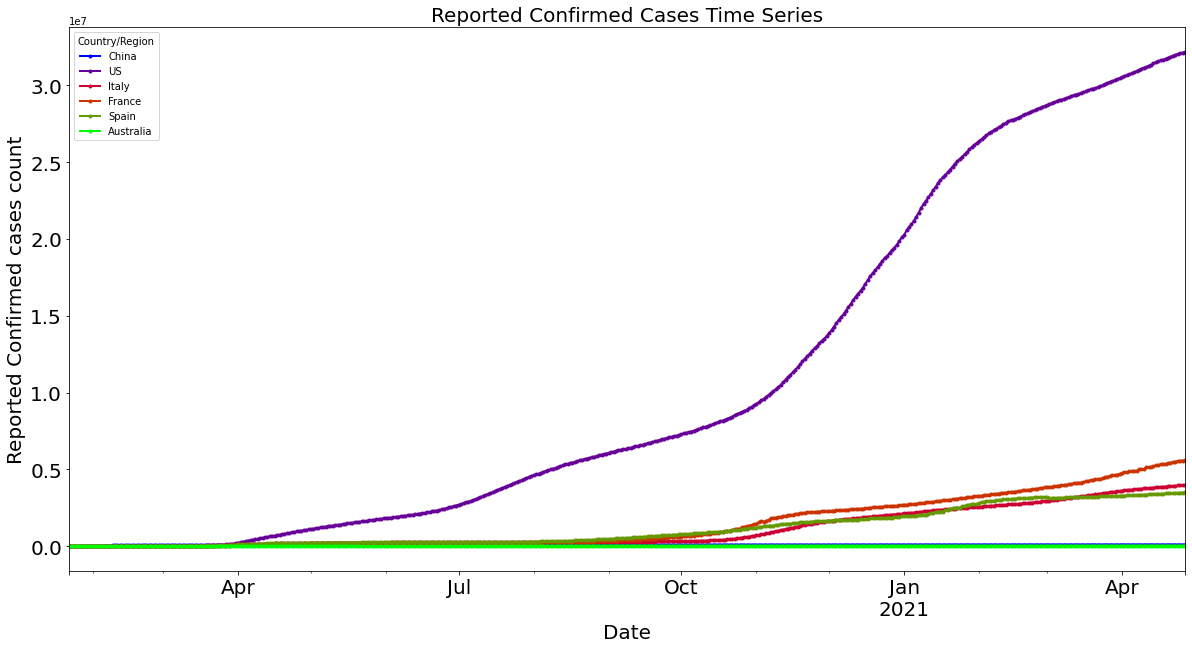

In [11]:
# Plot time series of several countries of interest
coi = ['China', 'US', 'Italy', 'France', 'Spain', 'Australia']
confirmed_country[coi].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Reported Confirmed cases count', fontsize=20)
plt.title('Reported Confirmed Cases Time Series', fontsize=20)

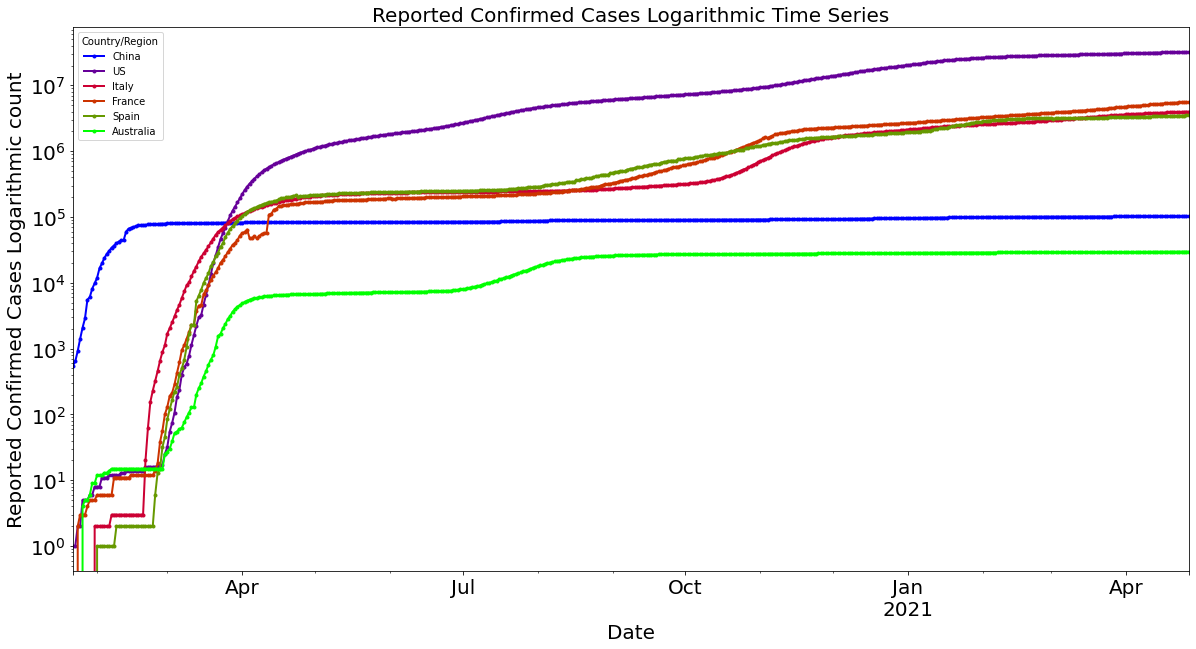

In [12]:
# Plot time series of several countries of interest 
# This time on logarithmic Scale
confirmed_country[coi].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20, logy=True)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Reported Confirmed Cases Logarithmic count', fontsize=20);
plt.title('Reported Confirmed Cases Logarithmic Time Series', fontsize=20);

Now the above plot show us a better picture. 

Things to remember while plotting data on log scale.
* If a variable takes on values over several orders of magnitude (e.g. in the 10s, 100s, and 1000s), we use a log axes so that the data is not all crammed into a small region of the visualization.
* If a curve is approximately linear on a log axis, then its approximately exponential growth and the gradient/slope of the line tells us about the exponent.

Considering the above points one can easily understand why the growth on linear scale is far much more that on logarithmic scale.

Now we will analyse the death dataset in a similar fashion.

In [13]:
# Split-Apply-Combine
deaths_country = raw_data_deaths.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)

# Transpose
deaths_country = deaths_country.transpose()

# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(deaths_country.index)
deaths_country.set_index(datetime_index, inplace=True)

# Check out head
deaths_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Plotting number of reported deaths by country
Let's now visualize the number of reported deaths:

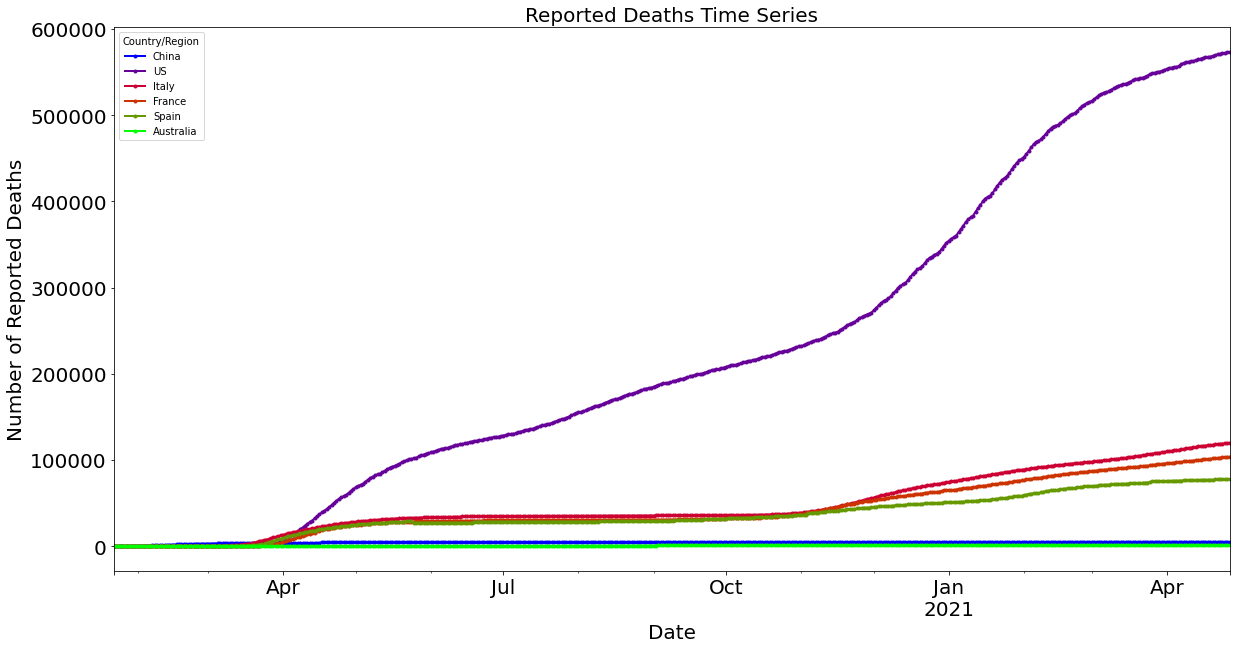

In [14]:
# Plot time series of several countries of interest
deaths_country[coi].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Reported Deaths Time Series', fontsize=20);

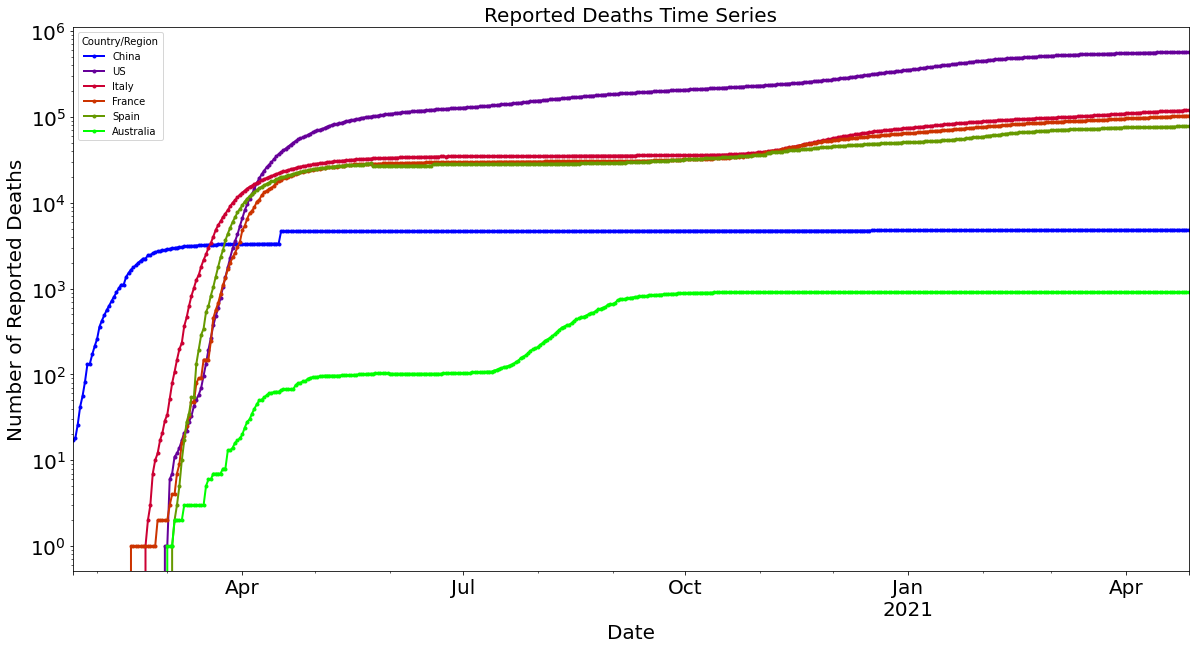

In [15]:
# Plot time series of several countries of interest
# this time on log scale
deaths_country[coi].plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, colormap='brg', logy=True)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Reported Deaths Time Series', fontsize=20);

### Aligning growth curves to start with day of number of known deaths ≥ 1000
To compare what's happening in different countries, we can align each country's growth curves to all start on the day when the number of known deaths ≥ 1000. To achieve this, first off, let's set set all values less than 1000 to NaN so that the associated data points don't get plotted at all when we visualize the data:

In [16]:
# Loop over columns & set values < 1000 to None
for col in deaths_country.columns:
    deaths_country.loc[(deaths_country[col] < 1000),col] = None

# Check out tail
deaths_country.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2021-04-23,2565.0,2367.0,3190.0,NaN,NaN,NaN,61176.0,3984.0,NaN,10055.0,...,127638.0,2227.0,NaN,NaN,2009.0,NaN,3138.0,1165.0,1245.0,1556.0
2021-04-24,2572.0,2372.0,3198.0,NaN,NaN,NaN,61474.0,4001.0,NaN,10070.0,...,127670.0,2283.0,NaN,NaN,2028.0,NaN,3151.0,1175.0,1245.0,1556.0
2021-04-25,2582.0,2378.0,3207.0,NaN,NaN,NaN,61644.0,4018.0,NaN,10087.0,...,127681.0,2326.0,NaN,NaN,2047.0,NaN,3167.0,1187.0,1246.0,1557.0
2021-04-26,2592.0,2379.0,3217.0,NaN,NaN,NaN,62087.0,4040.0,NaN,10098.0,...,127688.0,2391.0,NaN,NaN,2065.0,NaN,3184.0,1205.0,1248.0,1560.0
2021-04-27,2598.0,2383.0,3225.0,NaN,NaN,NaN,62599.0,4058.0,NaN,10126.0,...,127705.0,2452.0,NaN,NaN,2082.0,NaN,3201.0,1207.0,1249.0,1565.0


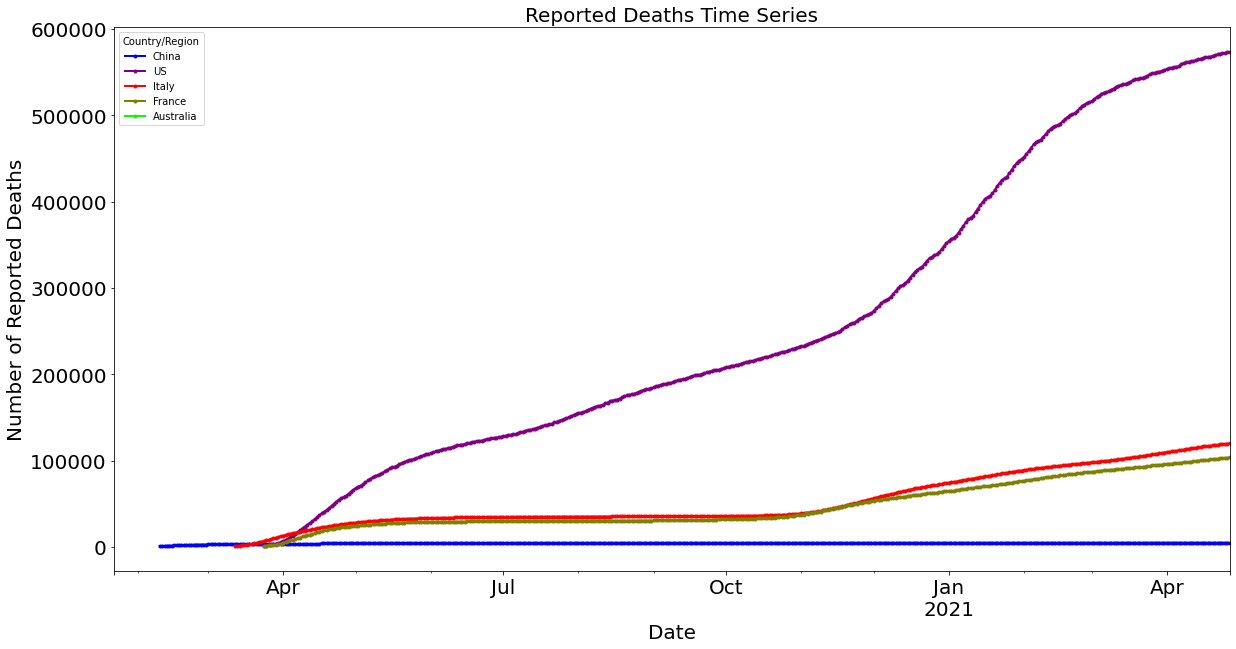

In [17]:
# Plot time series of several countries of interest
coi = ['China', 'US', 'Italy', 'France', 'Australia']
deaths_country[coi].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Reported Deaths Time Series', fontsize=20);

In [18]:
# Drop columns that are all NaNs (i.e. countries that haven't yet reached 25 deaths)
deaths_country.dropna(axis=1, how='all', inplace=True)
deaths_country.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 462 entries, 2020-01-22 to 2021-04-27
Data columns (total 98 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Afghanistan             290 non-null    float64
 1   Albania                 136 non-null    float64
 2   Algeria                 291 non-null    float64
 3   Argentina               311 non-null    float64
 4   Armenia                 202 non-null    float64
 5   Austria                 183 non-null    float64
 6   Azerbaijan              162 non-null    float64
 7   Bangladesh              322 non-null    float64
 8   Belarus                 173 non-null    float64
 9   Belgium                 391 non-null    float64
 10  Bolivia                 304 non-null    float64
 11  Bosnia and Herzegovina  190 non-null    float64
 12  Brazil                  383 non-null    float64
 13  Bulgaria                191 non-null    float64
 14  Burma                  

As we're going to align the countries from the day they first had at least 1000 deaths, we won't need the DateTimeIndex. In fact, we won't need the date at all. So we can

1. Reset the Index, which will give us an ordinal index (which turns the date into a regular column).
2. Drop the date column (which will be called 'index) after the reset.

In [19]:
# sort index, drop date column
deaths_country_drop = deaths_country.reset_index().drop(['index'], axis=1)
deaths_country_drop.head()

Country/Region,Afghanistan,Albania,Algeria,Argentina,Armenia,Austria,Azerbaijan,Bangladesh,Belarus,Belgium,...,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Venezuela,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now it's time to shift each column so that the first entry is the first NaN value that it contains! To do this, we can use the shift() method on each column. How much do we shift each column, though? The magnitude of the shift is given by how many NaNs there are at the start of the column, which we can retrieve using the first_valid_index() method on the column but we want to shift up, which is negative in direction (by convention and perhaps intuition). 

In [20]:
# shift
for col in deaths_country_drop.columns:
    deaths_country_drop[col] = deaths_country_drop[col].shift(-deaths_country_drop[col].first_valid_index())
# check out head
deaths_country_drop.head()

Country/Region,Afghanistan,Albania,Algeria,Argentina,Armenia,Austria,Azerbaijan,Bangladesh,Belarus,Belgium,...,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Venezuela,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,1012.0,1003.0,1004.0,1011.0,1004.0,1005.0,1005.0,1012.0,1001.0,1011.0,...,1031.0,1004.0,1001.0,1174.0,1009.0,1002.0,1000.0,1004.0,1002.0,1005.0
1,1040.0,1016.0,1011.0,1043.0,1010.0,1027.0,1030.0,1049.0,1004.0,1143.0,...,1364.0,1012.0,1014.0,1466.0,1041.0,1006.0,1023.0,1022.0,1016.0,1075.0
2,1064.0,1028.0,1018.0,1078.0,1016.0,1056.0,1053.0,1095.0,1007.0,1283.0,...,1783.0,1022.0,1027.0,1679.0,1071.0,1010.0,1048.0,1031.0,1020.0,1103.0
3,1096.0,1040.0,1028.0,1116.0,1020.0,1082.0,1079.0,1139.0,1011.0,1447.0,...,2305.0,1045.0,1041.0,2053.0,1101.0,1013.0,1078.0,1049.0,1031.0,1122.0
4,1117.0,1055.0,1040.0,1150.0,1026.0,1109.0,1107.0,1171.0,1016.0,1632.0,...,2947.0,1061.0,1055.0,2457.0,1146.0,1014.0,1097.0,1068.0,1040.0,1160.0


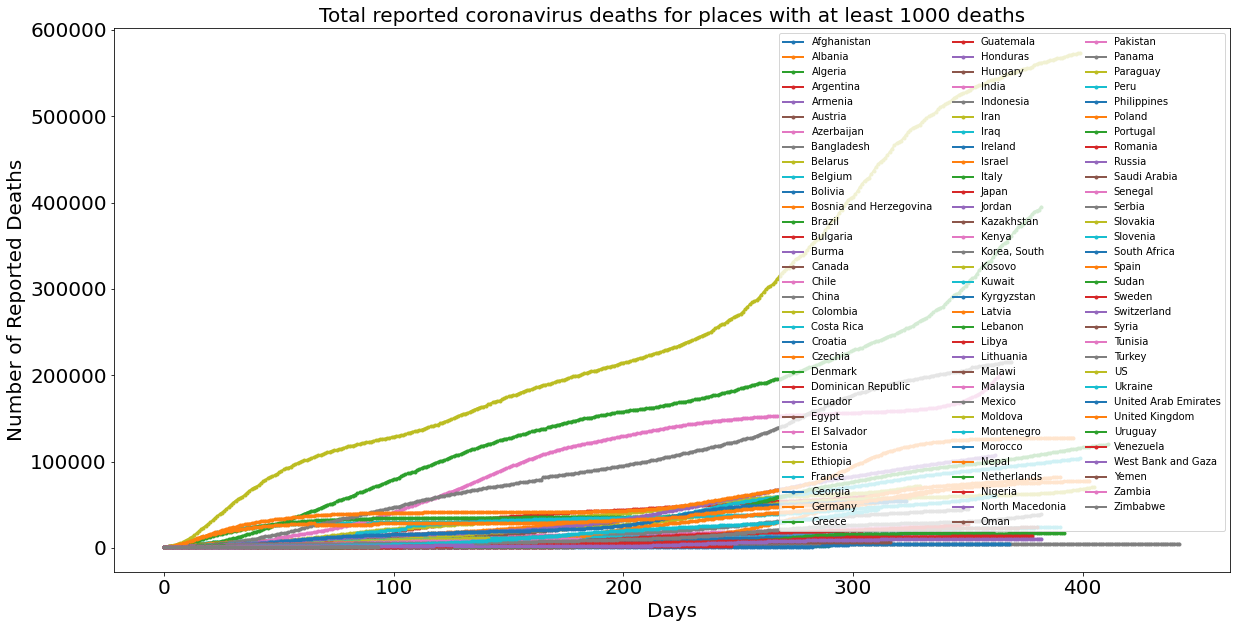

In [21]:
# Plot time series 
ax = deaths_country_drop.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20)
ax.legend(ncol=3, loc='upper right')
plt.xlabel('Days', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Total reported coronavirus deaths for places with at least 1000 deaths', fontsize=20);

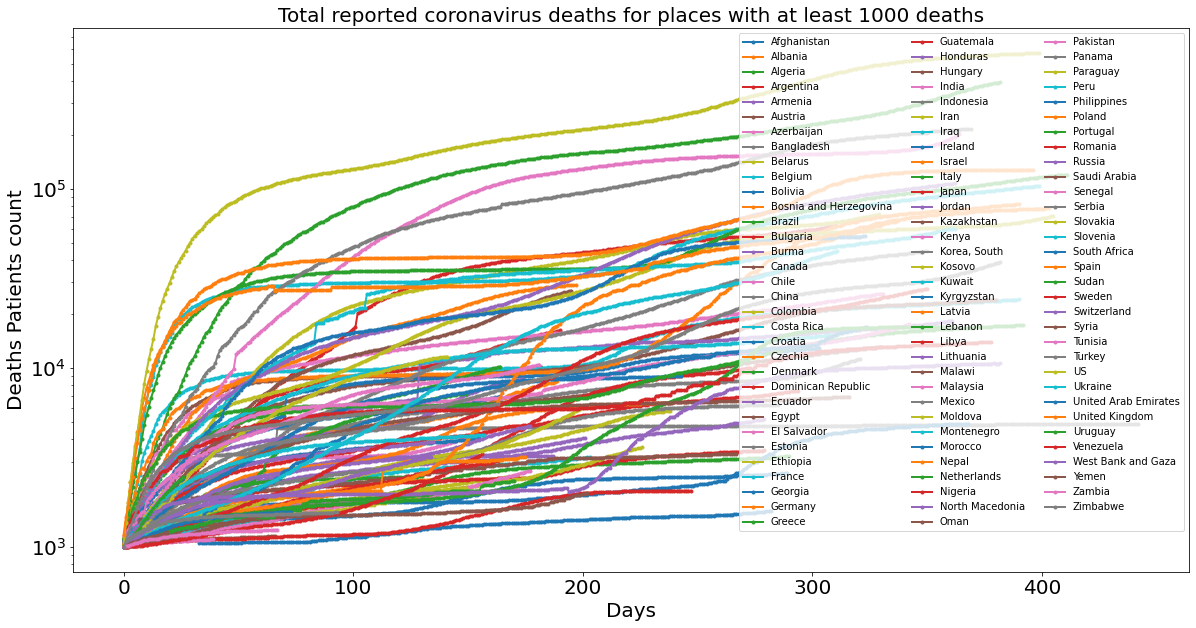

In [22]:
# Plot semi log time series 
ax = deaths_country_drop.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy=True)
ax.legend(ncol=3, loc='upper right')
plt.xlabel('Days', fontsize=20);
plt.ylabel('Deaths Patients count', fontsize=20);
plt.title('Total reported coronavirus deaths for places with at least 1000 deaths', fontsize=20);

Although we have managed to plot what we wanted, the above plots are challenging to retrieve any meaningful information from. There are too many growth curves so that it's very crowded and too many colours look the same so it's difficult to tell which country is which from the legend. Below, we'll plot less curves and further down in the notebook we'll use the python package Altair to introduce interactivity into the plot in order to deal with this challenge.

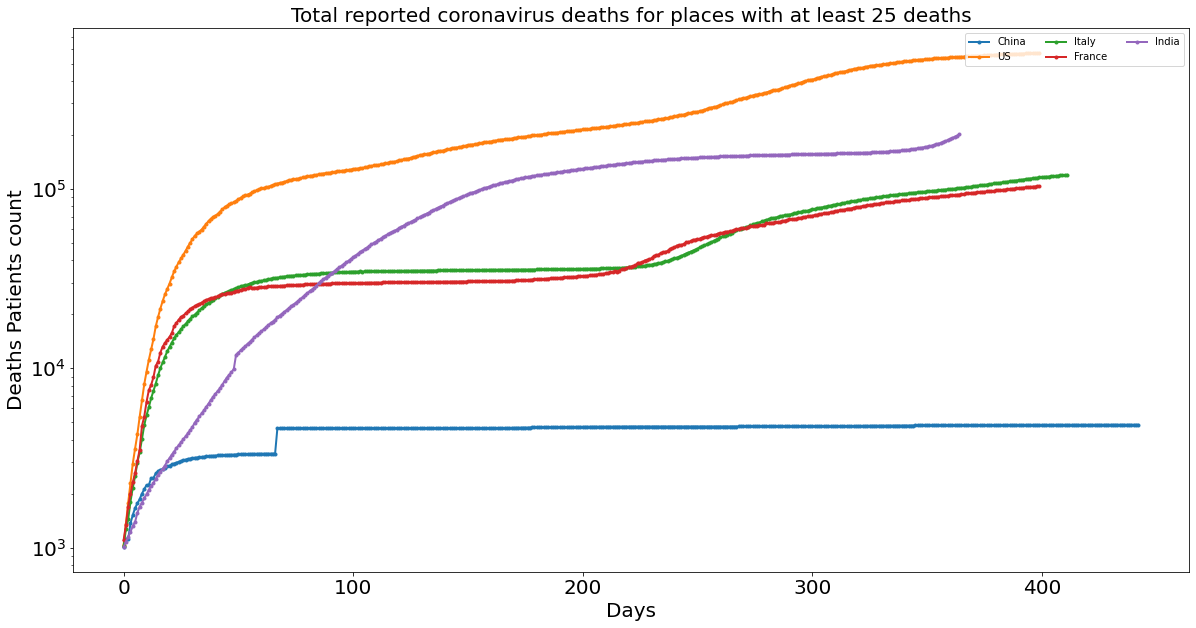

In [23]:
# Plot semi log time series 
coi = ['China', 'US', 'Italy', 'France', 'India'] 
# removed Australia as there has not been 1000 deaths instead added India to get info about the condition in India.
ax = deaths_country_drop[coi].plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy=True)
ax.legend(ncol=3, loc='upper right')
plt.xlabel('Days', fontsize=20);
plt.ylabel('Deaths Patients count', fontsize=20);
plt.title('Total reported coronavirus deaths for places with at least 25 deaths', fontsize=20);

Till now, we have
1. looked at the dataset containing the number of reported deaths for each region,
2. wrangled the data to look at the number of reported deaths by country,
3. plotted the number of reported deaths by country (both log and semi-log),
4. aligned growth curves to start with day of number of known deaths ≥ 25.

# Plotting number of recovered people
The third dataset in the Hopkins repository is the number of recovered. We want to do similar data wrangling as in the two cases above so we could copy and paste our code again but, if you're writing the same code three times, it's likely time to write a function.

In [24]:
# Function for grouping countries by region
def group_by_country(raw_data):
    """Returns data for countries indexed by date"""
    # Group by
    data = raw_data.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
    # Transpose
    data = data.transpose()
    # Set index as DateTimeIndex
    datetime_index = pd.DatetimeIndex(data.index)
    data.set_index(datetime_index, inplace=True)
    return data

In [25]:
# Function to align growth curves
def align_curves(data, min_val):
    """Align growth curves  to start on the day when the number of known deaths = min_val"""
    # Loop over columns & set values < min_val to None
    for col in data.columns:
        data.loc[(data[col] < min_val),col] = None
    # Drop columns with all NaNs
    data.dropna(axis=1, how='all', inplace=True)
    # Reset index, drop date
    data = data.reset_index().drop(['index'], axis=1)
    # Shift each column to begin with first valid index
    for col in data.columns:
        data[col] = data[col].shift(-data[col].first_valid_index())
    return data

In [26]:
# Function to plot time series
def plot_time_series(df, plot_title, x_label, y_label, logy=False):
    """Plot time series and make looks a bit nice"""
    ax = df.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy=logy)
    ax.legend(ncol=3, loc='lower right')
    plt.xlabel(x_label, fontsize=20);
    plt.ylabel(y_label, fontsize=20);
    plt.title(plot_title, fontsize=20);

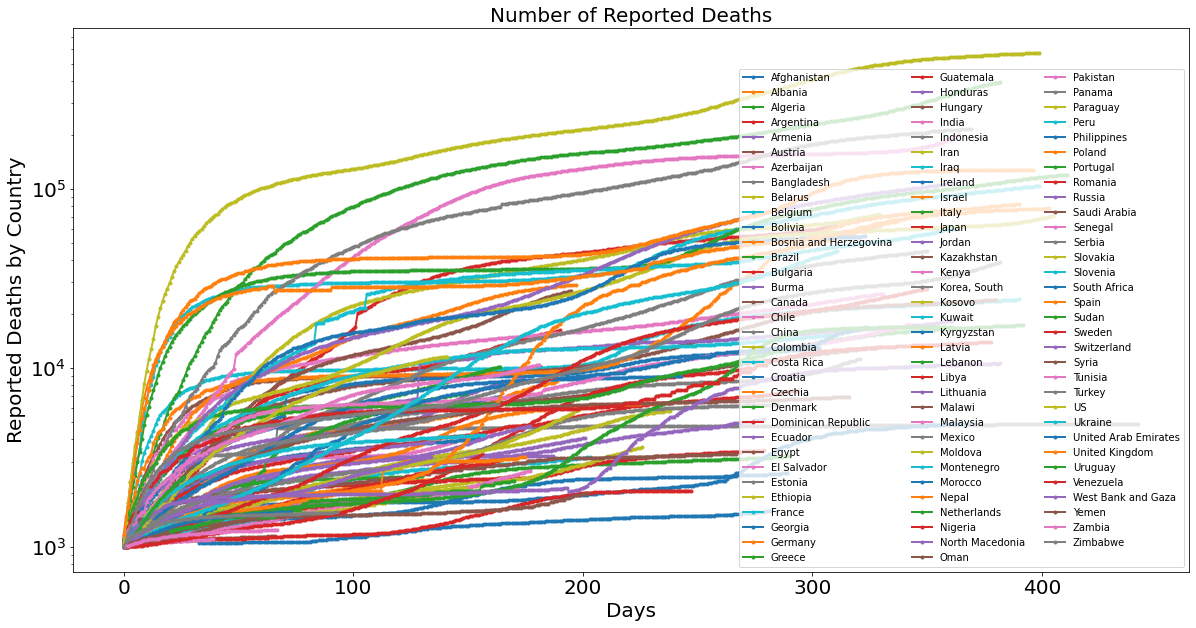

In [27]:
# sanity check, let's see these functions at work on the 'number of deaths' data on which we have already worked

deaths_country_drop = group_by_country(raw_data_deaths)
deaths_country_drop = align_curves(deaths_country_drop, min_val=1000)
plot_time_series(deaths_country_drop, 'Number of Reported Deaths', 'Days', 'Reported Deaths by Country', logy=True)

Now let's check use our functions to group, wrangle, and plot the recovered patients data:

In [28]:
# group by country and check out tail
recovered_country = group_by_country(raw_data_recovered)
recovered_country.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2021-04-23,52363,104278,84038,12423,23089,995,2474514,192281,23191,568213,...,14281,148561,85232,3,172035,2490,259105,2454,89256,35094
2021-04-24,52392,105016,84167,12458,23092,1002,2496277,193360,23195,570684,...,14388,151669,85536,3,173097,2490,260650,2486,89403,35101
2021-04-25,52489,105728,84299,12491,23092,1002,2518167,194080,23209,573155,...,14452,154489,85764,3,173097,2516,262602,2546,89574,35123
2021-04-26,52520,106465,84440,12519,23288,1002,2542004,194900,23253,575217,...,14552,157560,85976,3,175242,2516,264660,2630,89678,35149
2021-04-27,52794,107163,84598,12561,23341,1014,2563223,195701,23260,577977,...,14567,160632,86180,3,176058,2516,267346,2674,89717,35480


In [29]:
# align curves and check out head
recovered_country_drop = align_curves(recovered_country, min_val=100000) # for recovery considering 1M recovered patients per country
recovered_country_drop.head()

Country/Region,Albania,Argentina,Armenia,Austria,Azerbaijan,Bahrain,Bangladesh,Belarus,Bolivia,Bosnia and Herzegovina,...,Spain,Switzerland,Tunisia,Turkey,US,Ukraine,United Arab Emirates,Uruguay,Venezuela,West Bank and Gaza
0,100013.0,103297.0,100913.0,103759.0,103550.0,100363.0,103227.0,100749.0,100347.0,100640.0,...,100875.0,122600.0,100207.0,101715.0,100372.0,100163.0,100007.0,101241.0,100476.0,101355.0
1,100600.0,108242.0,103055.0,107875.0,107635.0,100772.0,105523.0,102113.0,100786.0,102339.0,...,102548.0,130000.0,101245.0,104030.0,106988.0,102347.0,101659.0,104241.0,100952.0,102942.0
2,101142.0,108242.0,105149.0,112728.0,111918.0,101168.0,106963.0,103848.0,101103.0,104135.0,...,108947.0,141000.0,104401.0,106133.0,111424.0,103762.0,103325.0,104434.0,101384.0,105233.0
3,101584.0,108242.0,106479.0,119415.0,114841.0,101629.0,108725.0,104698.0,101523.0,104135.0,...,112050.0,141000.0,104980.0,108137.0,115936.0,104966.0,104943.0,110277.0,101823.0,106718.0
4,102171.0,181389.0,107364.0,125674.0,119005.0,102289.0,110098.0,105835.0,102083.0,104135.0,...,112050.0,141000.0,105364.0,109962.0,120720.0,107210.0,106354.0,113125.0,102289.0,108118.0


Plotting the time series

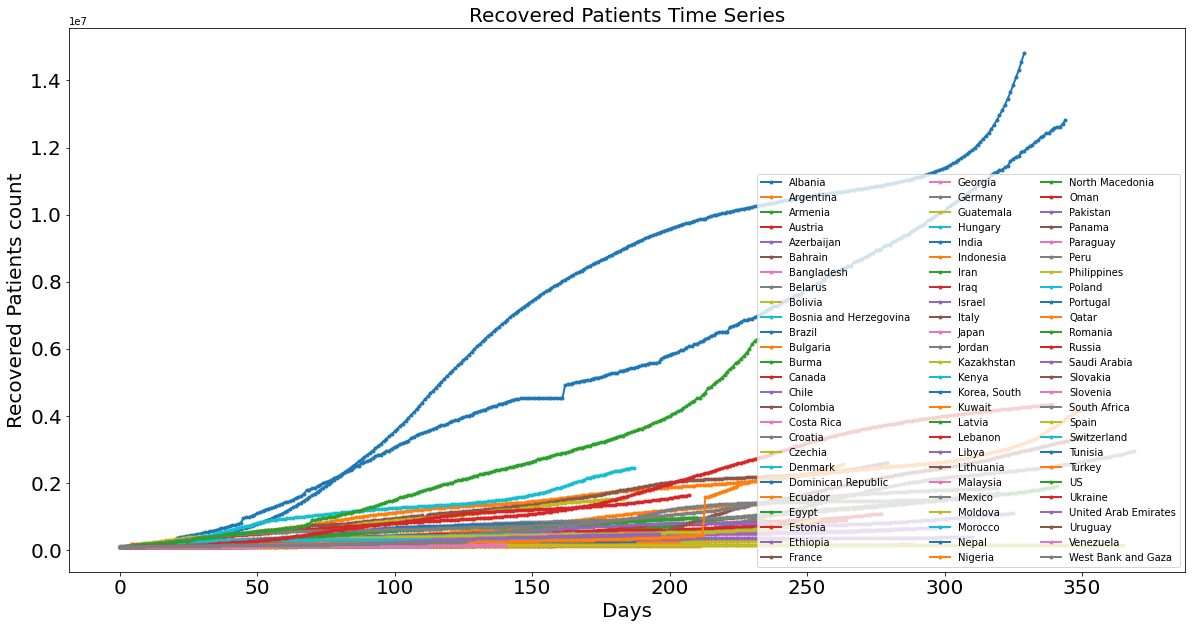

In [30]:
plot_time_series(recovered_country_drop, 'Recovered Patients Time Series', 'Days', 'Recovered Patients count')

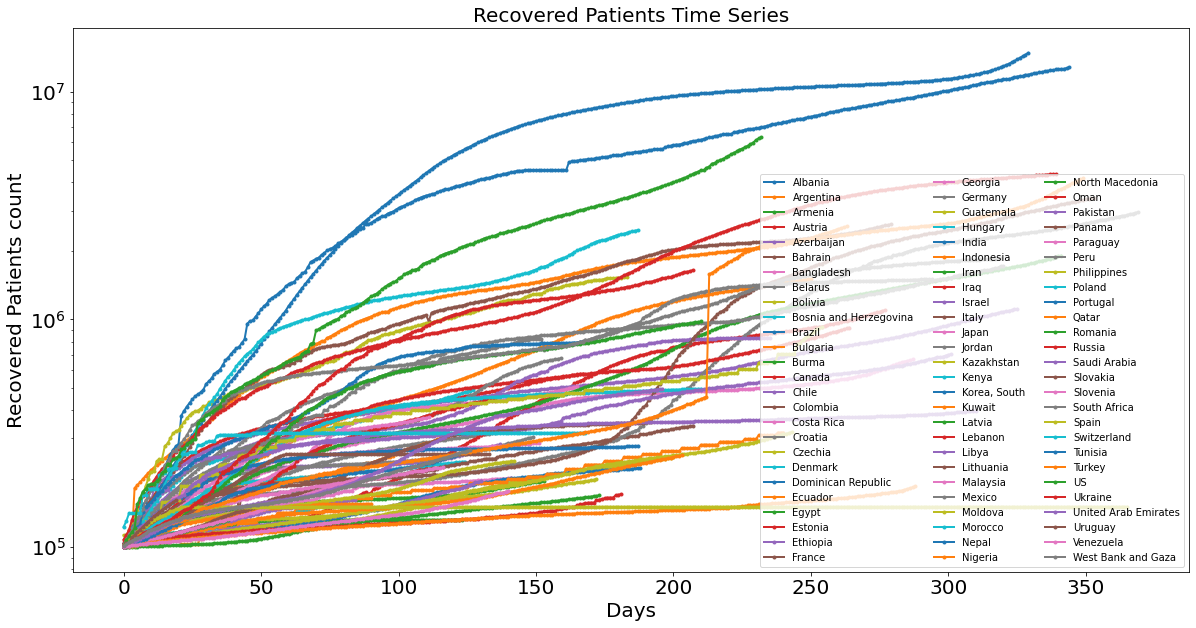

In [31]:
# on log scale
plot_time_series(recovered_country_drop, 'Recovered Patients Time Series', 'Days', 'Recovered Patients count', True)

Once again, the above plots are challenging to retrieve any meaningful information from. There are too many growth curves so that it's very crowded and too many colours look the same so it's difficult to tell which country is which from the legend. Let's plot less curves and in the next section we'll use the python package Altair to introduce interactivity into such a plot in order to deal with this challenge.

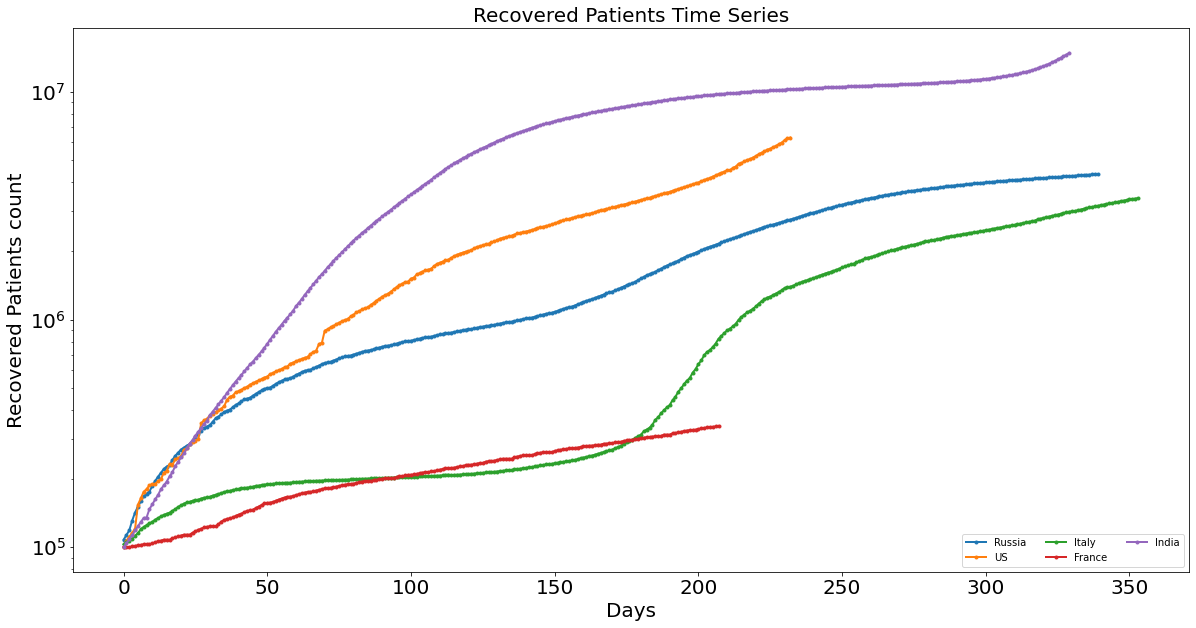

In [32]:
coi = ['Russia', 'US', 'Italy', 'France', 'India'] # removing China and adding Russia as China did not have 1M recovered patients
plot_time_series(recovered_country_drop[coi], 'Recovered Patients Time Series', 'Days', 'Recovered Patients count', True)

### Observation
India is recovering at fastest pace out of all other countries closely followed by US and then Russia.

Till now, we've

1. looked at the dataset containing the number of reported recoveries for each region,
2. written function for grouping, wrangling, and plotting the data,
3. grouped, wrangled, and plotted the data for the number of reported recoveries.

# Interactive plots with altair
We're now going to build some interactive data visualizations. We're going to use a tool called Altair.

Before jumping into Altair, let's reshape our deaths_country dataset. Notice that it's currently in wide data format, with a column for each country and a row for each "day" (where day 1 is the first day with over 25 confirmed deaths). This worked with the pandas plotting API for reasons discussed above.

In [33]:
# Look at head
deaths_country_drop.head()

Country/Region,Afghanistan,Albania,Algeria,Argentina,Armenia,Austria,Azerbaijan,Bangladesh,Belarus,Belgium,...,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Venezuela,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,1012.0,1003.0,1004.0,1011.0,1004.0,1005.0,1005.0,1012.0,1001.0,1011.0,...,1031.0,1004.0,1001.0,1174.0,1009.0,1002.0,1000.0,1004.0,1002.0,1005.0
1,1040.0,1016.0,1011.0,1043.0,1010.0,1027.0,1030.0,1049.0,1004.0,1143.0,...,1364.0,1012.0,1014.0,1466.0,1041.0,1006.0,1023.0,1022.0,1016.0,1075.0
2,1064.0,1028.0,1018.0,1078.0,1016.0,1056.0,1053.0,1095.0,1007.0,1283.0,...,1783.0,1022.0,1027.0,1679.0,1071.0,1010.0,1048.0,1031.0,1020.0,1103.0
3,1096.0,1040.0,1028.0,1116.0,1020.0,1082.0,1079.0,1139.0,1011.0,1447.0,...,2305.0,1045.0,1041.0,2053.0,1101.0,1013.0,1078.0,1049.0,1031.0,1122.0
4,1117.0,1055.0,1040.0,1150.0,1026.0,1109.0,1107.0,1171.0,1016.0,1632.0,...,2947.0,1061.0,1055.0,2457.0,1146.0,1014.0,1097.0,1068.0,1040.0,1160.0


For Altair, we'll want to convert the data into long data format. What this will do essentially have a row for each country/day pair so our columns will be 'Day', 'Country', and number of 'Deaths'. We do this using the dataframe method .melt() as follows:

In [34]:
# create long data for deaths
deaths_long = deaths_country_drop.reset_index().melt(id_vars='index', value_name='Deaths').rename(columns={'index':'Day'})
deaths_long.head()

,Day,Country/Region,Deaths
0,0,Afghanistan,1012.0
1,1,Afghanistan,1040.0
2,2,Afghanistan,1064.0
3,3,Afghanistan,1096.0
4,4,Afghanistan,1117.0


In [35]:
deaths_long.shape

(45276, 3)

Altair can only plot maximum of 5000 rows. So, we will sort the Dataframe based on Deaths in non-increasing fashion.

In [36]:
deaths_long.sort_values(by="Deaths", ascending=False)

,Day,Country/Region,Deaths
41055,399,US,573381.0
41054,398,US,572740.0
41053,397,US,572266.0
41052,396,US,571987.0
41051,395,US,571263.0
...,...,...,...
45271,457,Zimbabwe,NaN
45272,458,Zimbabwe,NaN
45273,459,Zimbabwe,NaN
45274,460,Zimbabwe,NaN


In [37]:
deaths_long_5000 = deaths_long[:5000]

In [38]:
deaths_long_5000.shape

(5000, 3)

In [39]:
# importing Altair
import altair as alt

# altair plot 
alt.Chart(deaths_long_5000).mark_line().encode(
    x='Day',
    y='Deaths',
    color='Country/Region')

alt.Chart(...)

We can now customize the code to thicken the line width, to alter the opacity, and to make the chart larger:

In [40]:
# altair plot 
alt.Chart(deaths_long_5000).mark_line(strokeWidth=4, opacity=0.7).encode(
    x='Day',
    y='Deaths',
    color='Country/Region'
).properties(
    width=800,
    height=650
)

alt.Chart(...)

We can also add a log y-axis. We'll also now add a hover tooltip so that, when we hover our cursor over any point on any of the lines, it will tell us the 'Country', the 'Day', and the number of 'Deaths'.

In [41]:
# altair plot 
alt.Chart(deaths_long_5000).mark_line(strokeWidth=4, opacity=0.7).encode(
    x=alt.X('Day'),
    y=alt.Y('Deaths', scale=alt.Scale(type='log')),
    color='Country/Region',
    tooltip=['Country/Region', 'Day','Deaths']
).properties(
    width=800,
    height=650
)

alt.Chart(...)

Adding a standout feature. That is when you hover over a graph the others turn grey; this will make the main graph stand out. For this reason, we build the chart, then an overlay, and then combine them. 

In [42]:
# Selection tool
selection = alt.selection_single(fields=['Country/Region'])
# Color change when clicked
color = alt.condition(selection,
                    alt.Color('Country/Region:N'),
                    alt.value('lightgray'))


# Base altair plot 
base = alt.Chart(deaths_long_5000).mark_line(strokeWidth=4, opacity=0.7).encode(
    x=alt.X('Day'),
    y=alt.Y('Deaths', scale=alt.Scale(type='log')),
    color='Country/Region',
    tooltip=['Country/Region', 'Day','Deaths']
).properties(
    width=800,
    height=650
)

# Chart
chart = base.encode(
  color=alt.condition(selection, 'Country/Region:N', alt.value('lightgray'))
).add_selection(
  selection
)

# Overlay
overlay = base.encode(
    color='Country/Region',
  opacity=alt.value(0.5),
  tooltip=['Country/Region:N', 'Name:N']
).transform_filter(
  selection
)

# combining
chart + overlay

alt.LayerChart(...)

It's not super easy to line up the legend with the curves on the chart so let's put the labels on the chart itself. 

In [43]:
# drop NaNs
deaths_long = deaths_long_5000.dropna()

# Selection tool
selection = alt.selection_single(fields=['Country/Region'])
# Color change when clicked
color = alt.condition(selection,
                    alt.Color('Country/Region:N'),
                    alt.value('lightgray'))


# Base altair plot 
base = alt.Chart(deaths_long).mark_line(strokeWidth=4, opacity=0.7).encode(
    x=alt.X('Day'),
    y=alt.Y('Deaths', scale=alt.Scale(type='log')),
    color=alt.Color('Country/Region', legend=None),
).properties(
    width=800,
    height=650
)

# Chart
chart = base.encode(
  color=alt.condition(selection, 'Country/Region:N', alt.value('lightgray'))
).add_selection(
  selection
)

# Overlay
overlay = base.encode(
  color='Country/Region',
  opacity=alt.value(0.5),
  tooltip=['Country/Region:N', 'Name:N']
).transform_filter(
  selection
)

# Text labels
text = base.mark_text(
    align='left',
    dx=5,
    size=10
).encode(
    x=alt.X('Day', aggregate='max',  axis=alt.Axis(title='Day')),
    y=alt.Y('Deaths', aggregate={'argmax': 'Day'}, axis=alt.Axis(title='Reported Deaths')),
    text='Country/Region',  
).transform_filter(
    selection
)

# combine
chart + overlay + text

alt.LayerChart(...)

So, now we've

1. melted the data into long format,
2. used Altair to make interactive plots of increasing richness,